# Classification

- seen how you can evaluate a supervised learner with a loss function
- Classification: predict a binary response variable, as in "Will this stock value go up today?".  
- Regression: "What will be the increase in stock value today?"

### Binary classification
$$y_i \in \{0,1\}$$ 

## Searching and Scoring


- Scoring: selecting a score based on $X$ variables such that when large guess that $y_i = 1$
- Searching: searching for similar examples in training data to get a score

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import plotnine as p9
from sklearn import neighbors, preprocessing, impute, metrics, model_selection
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.simplefilter("ignore")

In [9]:
bank = pd.read_csv('../data/bank.csv',sep=';',na_values=['unknown',999,'nonexistent'])

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4483 non-null object
marital      4521 non-null object
education    4334 non-null object
default      4521 non-null object
balance      4519 non-null float64
housing      4521 non-null object
loan         4521 non-null object
contact      3197 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     816 non-null object
y            4521 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 600.5+ KB


In [11]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,NaN,5,may,226,1,-1,0,NaN,no


In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [13]:
bank_tr, bank_te = model_selection.train_test_split(bank,test_size=.33)

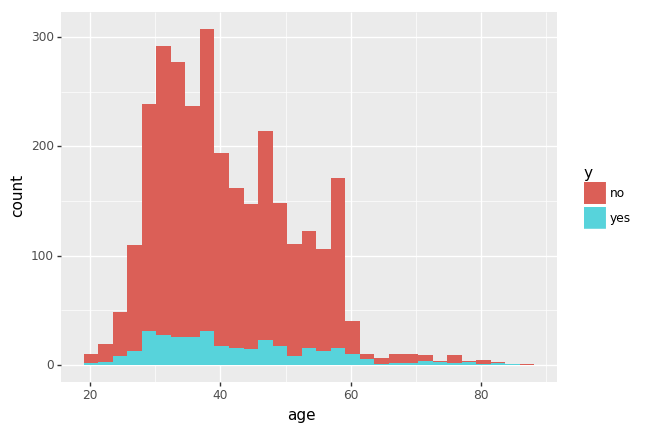

<ggplot: (8783672307348)>

In [21]:
p9.ggplot(bank_tr) + p9.aes(x = 'age',fill = 'y') + p9.geom_histogram()

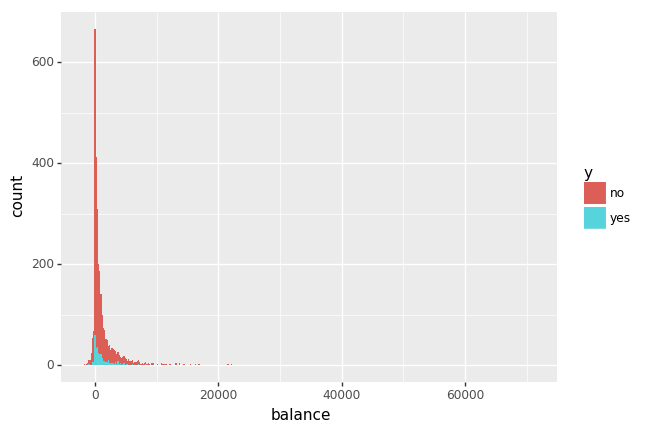

<ggplot: (-9223363253184811937)>

In [20]:
p9.ggplot(bank_tr[['balance','y']].dropna(axis=0)) + p9.aes(x = 'balance',fill = 'y') + p9.geom_histogram()

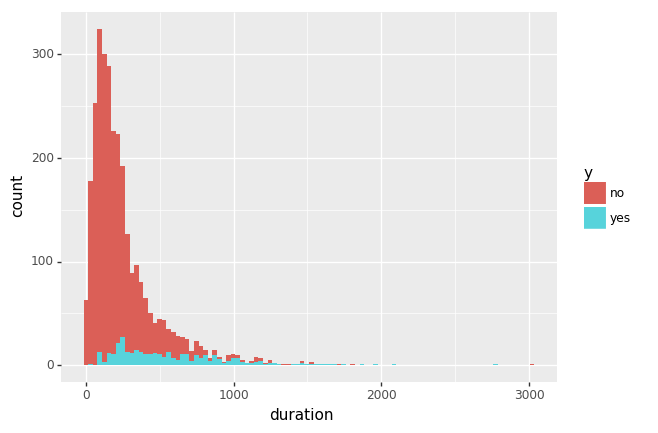

<ggplot: (-9223363253184932029)>

In [19]:
p9.ggplot(bank_tr[['duration','y']].dropna(axis=0)) + p9.aes(x = 'duration',fill = 'y') + p9.geom_histogram()

In [22]:
def train_bank_to_xy(bank):
    """standardize and impute training"""
    bank_sel = bank[['age','balance','duration','y']].values
    X,y = bank_sel[:,:-1], bank_sel[:,-1]
    scaler = preprocessing.StandardScaler().fit(X)
    imputer = impute.SimpleImputer(fill_value=0).fit(X)
    trans_prep = lambda Z: imputer.transform(scaler.transform(Z)) 
    X = trans_prep(X)
    y = 1*(y == 'yes')
    return (X, y), trans_prep

def test_bank_to_xy(bank, trans_prep):
    """standardize and impute test"""
    bank_sel = bank[['age','balance','duration','y']].values
    X,y = bank_sel[:,:-1], bank_sel[:,-1]
    X = trans_prep(X)
    y = 1*(y == 'yes')
    return (X, y)

In [24]:
(X_tr, y_tr), trans_prep  = train_bank_to_xy(bank_tr)
X_te, y_te = test_bank_to_xy(bank_te, trans_prep)

In [234]:
## Set the score to be standardized duration
score_dur = X_te[:,2]

In [27]:
def plot_conf_score(y_te,score,tau):
    y_pred = 1*(score > tau)
    classes = [1,0]
    conf = metrics.confusion_matrix(y_te, y_pred)
    plot_confusion_matrix(conf, classes)

Confusion matrix, without normalization
[[1208  111]
 [ 113   60]]


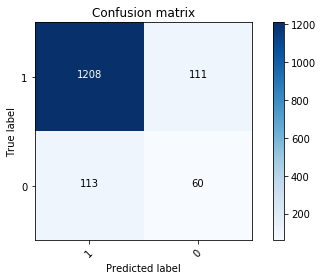

In [31]:
plot_conf_score(y_te,score_dur,1.)

Confusion matrix, without normalization
[[1286   33]
 [ 143   30]]


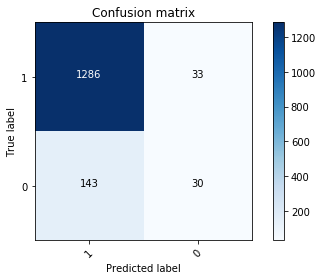

In [32]:
plot_conf_score(y_te,score_dur,2.)

### Confusion matrix and metrics

<table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
    <tr><td></td><td>Pred 1</td><td>Pred 0</td></tr>
    <tr><td>True 1</td><td>True Pos</td><td>False Neg</td></tr>
    <tr><td>True 0</td><td>False Pos</td><td>True Neg</td></tr>
</table>

$$
\textrm{FPR} = \frac{FP}{FP+TN}
$$
$$
\textrm{TPR, Recall} = \frac{TP}{TP + FN}
$$
$$
\textrm{Precision} = \frac{TP}{TP + FP}
$$

Confusion matrix, without normalization
[[1130  189]
 [  87   86]]


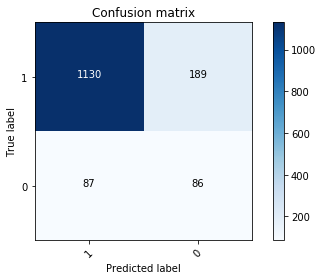

In [33]:
plot_conf_score(y_te,score_dur,.5)

## Searching

### (pseudo-)Metrics

- $d(x_i,x_j) = 0$: most similar
- $d(x_i,x_j)$ larger: less similar

### K nearest neighbors:

- For a test point $x_{n+1}$
- Compute distances to $x_1,\ldots,x_n$
- Sort training points by distance
- return K closest

In [35]:
## Fit and find NNs
nn = neighbors.NearestNeighbors(n_neighbors=10,metric="l2")
nn.fit(X_tr)
dists, NNs = nn.kneighbors(X_te)

In [39]:
NNs[1], y_tr[NNs[1]].mean(), y_te[1]

(array([ 878, 1885, 2932, 2374, 2484,  114, 1240, 1460,  334,  689]), 0.5, 0)

Confusion matrix, without normalization
[[1175  144]
 [  90   83]]


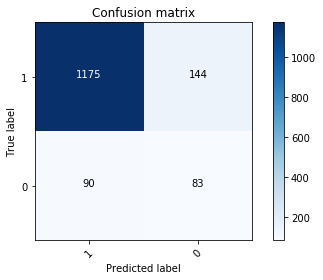

In [40]:
score_nn = np.array([y_tr[knns].mean() for knns in NNs])

plot_conf_score(y_te,score_nn,.2)

In [41]:
nn = neighbors.KNeighborsClassifier(n_neighbors=10)
nn.fit(X_tr, y_tr)
score_nn = nn.predict_proba(X_te)[:,1]

Confusion matrix, without normalization
[[1175  144]
 [  90   83]]


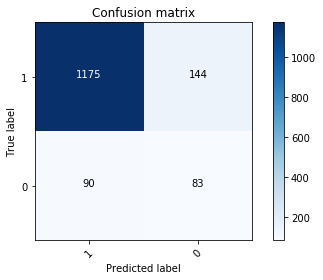

In [42]:
plot_conf_score(y_te,score_nn,.2)

In [43]:
def print_top_k(score_dur,y_te,k_top):
    ordering = np.argsort(score_dur)[::-1]
    print("k: score, y")
    for k, (yv,s) in enumerate(zip(y_te[ordering],score_dur[ordering])):
        print("{}: {}, {}".format(k,s,yv))
        if k >= k_top - 1:
            break

In [44]:
print_top_k(score_dur,y_te,10)

k: score, y
0: 8.377991511409602, 1
1: 6.745173502262785, 1
2: 6.611335960529439, 0
3: 5.6400578005217294, 0
4: 5.567403135009342, 1
5: 4.840856479885465, 0
6: 4.783497533428316, 1
7: 4.783497533428316, 0
8: 4.737610376262598, 0
9: 4.615244623820682, 1


### Confusion matrix and metrics

<table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
    <tr><td></td><td>Pred 1</td><td>Pred 0</td></tr>
    <tr><td>True 1</td><td>True Pos</td><td>False Neg</td></tr>
    <tr><td>True 0</td><td>False Pos</td><td>True Neg</td></tr>
</table>

$$
\textrm{FPR} = \frac{FP}{FP+TN}
$$
$$
\textrm{TPR, Recall} = \frac{TP}{TP + FN}
$$
$$
\textrm{Precision} = \frac{TP}{TP + FP}
$$

In [45]:
plt.style.use('ggplot')

Text(0.5, 1.0, "ROC for 'duration'")

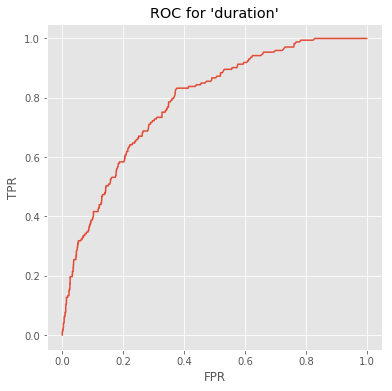

In [47]:
fpr_dur, tpr_dur, threshs = metrics.roc_curve(y_te,score_dur)
plt.figure(figsize=(6,6))
plt.plot(fpr_dur,tpr_dur)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC for 'duration'")

In [52]:
def plot_temp():
    plt.figure(figsize=(6,6))
    plt.plot(fpr_dur,tpr_dur,label='duration')
    plt.plot(fpr_nn,tpr_nn,label='knn')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.title("ROC")

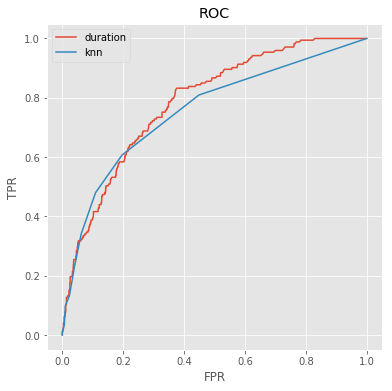

In [53]:
fpr_nn, tpr_nn, threshs = metrics.roc_curve(y_te,score_nn)
plot_temp()

In [49]:
def plot_temp():
    plt.figure(figsize=(6,6))
    plt.plot(rec_dur,prec_dur,label='duration')
    plt.plot(rec_nn,prec_nn,label='knn')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.legend()
    plt.title("PR curve")

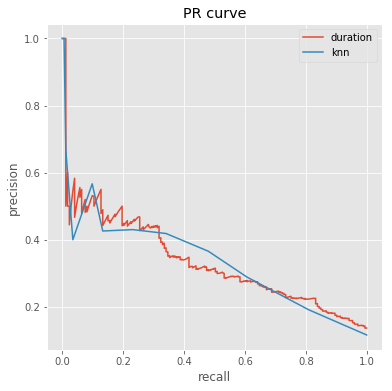

In [50]:
prec_dur, rec_dur, threshs = metrics.precision_recall_curve(y_te,score_dur)
prec_nn, rec_nn, threshs = metrics.precision_recall_curve(y_te,score_nn)
plot_temp()